In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import xgboost as xgb


In [3]:
data = pd.read_csv('cleanedData.csv')
print(data.shape)
data.head()

(2930, 76)


Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area  Street  \
0      1  526301100           20        RL         141.0     31770       1   
1      2  526350040           20        RH          80.0     11622       1   
2      3  526351010           20        RL          81.0     14267       1   
3      4  526353030           20        RL          93.0     11160       1   
4      5  527105010           60        RL          74.0     13830       1   

  Lot Shape Land Contour Utilities  ... 3Ssn Porch Screen Porch    Fence  \
0       IR1          Lvl    AllPub  ...          0            0  NoFence   
1       Reg          Lvl    AllPub  ...          0          120    MnPrv   
2       IR1          Lvl    AllPub  ...          0            0  NoFence   
3       Reg          Lvl    AllPub  ...          0            0  NoFence   
4       IR1          Lvl    AllPub  ...          0            0    MnPrv   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  HasFence  
0        0       5    2010       WD           Normal     215000         0  
1        0       6    2010       WD           Normal     105000         1  
2    12500       6    2010       WD           Normal     172000         0  
3        0       4    2010       WD           Normal     244000         0  
4        0       3    2010       WD           Normal     189900         1  

[5 rows x 76 columns]

In [4]:
X, y = data.drop("SalePrice", axis = 'columns'), data['SalePrice']
X.head()


Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area  Street  \
0      1  526301100           20        RL         141.0     31770       1   
1      2  526350040           20        RH          80.0     11622       1   
2      3  526351010           20        RL          81.0     14267       1   
3      4  526353030           20        RL          93.0     11160       1   
4      5  527105010           60        RL          74.0     13830       1   

  Lot Shape Land Contour Utilities  ... Enclosed Porch 3Ssn Porch  \
0       IR1          Lvl    AllPub  ...              0          0   
1       Reg          Lvl    AllPub  ...              0          0   
2       IR1          Lvl    AllPub  ...              0          0   
3       Reg          Lvl    AllPub  ...              0          0   
4       IR1          Lvl    AllPub  ...              0          0   

  Screen Porch    Fence Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  \
0            0  NoFence        0       5    2010        WD           Normal   
1          120    MnPrv        0       6    2010        WD           Normal   
2            0  NoFence    12500       6    2010        WD           Normal   
3            0  NoFence        0       4    2010        WD           Normal   
4            0    MnPrv        0       3    2010        WD           Normal   

   HasFence  
0         0  
1         1  
2         0  
3         0  
4         1  

[5 rows x 75 columns]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

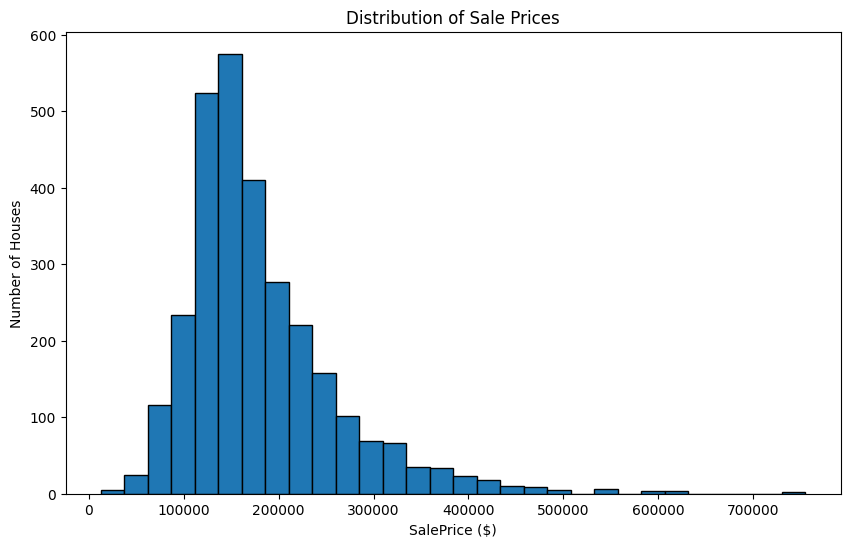

In [7]:
plt.figure(figsize=(10,6))
plt.hist(data['SalePrice'], bins=30, edgecolor='black')
plt.title("Distribution of Sale Prices")
plt.xlabel("SalePrice ($)")
plt.ylabel("Number of Houses")
plt.show()

In [8]:
data['SalePrice'].value_counts().sort_index()

SalePrice
12789     1
13100     1
34900     1
35000     1
35311     1
         ..
611657    1
615000    1
625000    1
745000    1
755000    1
Name: count, Length: 1032, dtype: int64

ideal ar fi sa avem pana in 100 de instante in fiecare bin (30 bins cu numar aproape egal de instante)
sau mai mare/mic decat media?
sau poate trebuie dupa distributia in 30 de bins facuta in graficul de deasupra?

In [9]:
total = 0 
bins = 0
lims = [] #limita superioara = valori pana la ....
frequency = [] #numarul de valori pana la limita superioara corespunzatoare
sorted_values = data['SalePrice'].value_counts().sort_index()
for i, j in sorted_values.items():
    if total + j > 100:
        bins += 1 
        lims.append(str(i))
        frequency.append(total)
        total = j
    else:
        total = total + j
print(bins)
print(lims)
print(frequency)

30
['81500', '95000', '106000', '113000', '119000', '124000', '128000', '131000', '135000', '138000', '141500', '145000', '148800', '154000', '159000', '164990', '170440', '176000', '181000', '187500', '194500', '204000', '214000', '225000', '237000', '252678', '272000', '300000', '338931', '438780']
[100, 98, 99, 98, 90, 98, 99, 97, 76, 92, 100, 77, 99, 99, 100, 100, 100, 89, 96, 98, 100, 97, 98, 96, 98, 100, 100, 98, 100, 100]


<BarContainer object of 30 artists>

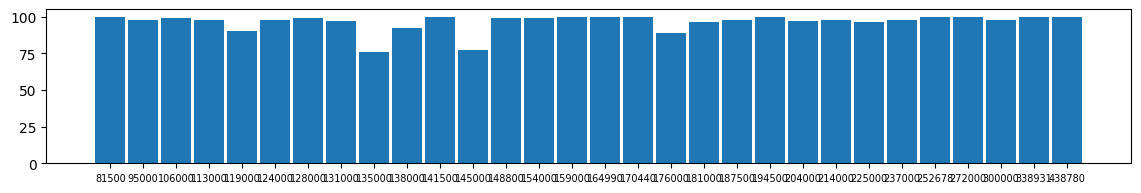

In [10]:
plt.figure(figsize=(14, 2))
plt.xticks(fontsize=7)
display(plt.bar(np.array(lims), np.array(frequency), width = 0.9))

In [11]:
lims_numeric = sorted([int(x) for x in lims])
lims_numeric.append(int(data['SalePrice'].max() + 1))
y_classEq = pd.cut(data['SalePrice'], bins=[0]+lims_numeric, labels=False, include_lowest=True)
y_classEq = y_classEq.astype(int)


In [12]:
X_numeric = pd.get_dummies(X) 
X_trainEq10, X_testEq10, y_trainEq10, y_testEq10 = train_test_split(
    X_numeric, y_classEq, test_size=0.1, random_state=42
)

In [13]:
modelEq10 = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    objective='multi:softmax'
)

modelEq10.fit(X_trainEq10, y_trainEq10)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [14]:
y_predEq10 = modelEq10.predict(X_testEq10)
y_probEq10 = modelEq10.predict_proba(X_testEq10)

print("\n Accuracy:", accuracy_score(y_testEq10, y_predEq10))

print("\n f1 score: ", sklearn.metrics.f1_score(y_testEq10, y_predEq10, average='micro'))

print("\n Precision:", sklearn.metrics.precision_score(y_testEq10, y_predEq10, average='micro'))

print("\n Recall", sklearn.metrics.recall_score(y_testEq10, y_predEq10, average='micro'))

print("\n Predicted class labels:", y_predEq10[:5])
print(" Actual class labels   :", y_testEq10[:5])



 Accuracy: 0.23890784982935154

 f1 score:  0.23890784982935154

 Precision: 0.23890784982935154

 Recall 0.23890784982935154

 Predicted class labels: [ 8  4 21  1  4]
 Actual class labels   : 1357    15
2367     4
2822    21
2126     5
1544     6
Name: SalePrice, dtype: int64


In [15]:
X_trainEq20, X_testEq20, y_trainEq20, y_testEq20 = train_test_split(
    X_numeric, y_classEq, test_size=0.2, random_state=42
)


In [16]:
modelEq20 = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    objective='multi:softmax'
)

modelEq20.fit(X_trainEq20, y_trainEq20)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [17]:
y_predEq20 = modelEq20.predict(X_testEq20)
y_probEq20 = modelEq20.predict_proba(X_testEq20)

print("\n Accuracy:", accuracy_score(y_testEq20, y_predEq20))

print("\n f1 score: ", sklearn.metrics.f1_score(y_testEq20, y_predEq20, average='micro'))

print("\n Accuracy:", sklearn.metrics.precision_score(y_testEq20, y_predEq20, average='micro'))

print("\n Recall", sklearn.metrics.recall_score(y_testEq20, y_predEq20, average='micro'))

print("\n Predicted class labels:", y_predEq20[:5])
print(" Actual class labels   :", y_testEq20[:5])



 Accuracy: 0.2098976109215017

 f1 score:  0.2098976109215017

 Accuracy: 0.2098976109215017

 Recall 0.2098976109215017

 Predicted class labels: [ 6  4 23  1  2]
 Actual class labels   : 1357    15
2367     4
2822    21
2126     5
1544     6
Name: SalePrice, dtype: int64


<Figure size 1000x800 with 0 Axes>

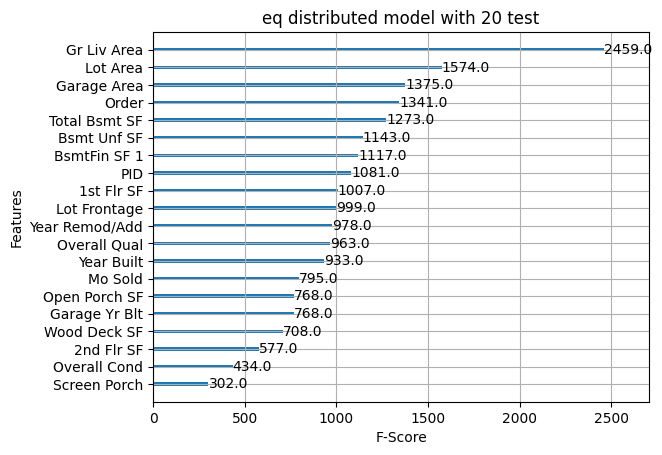

In [18]:
from xgboost import plot_importance

plt.figure(figsize=(10, 8))
plot_importance(
    modelEq20,
    importance_type='weight',
    xlabel='F-Score',
    max_num_features=20 
)
plt.title("eq distributed model with 20 test")
plt.show()

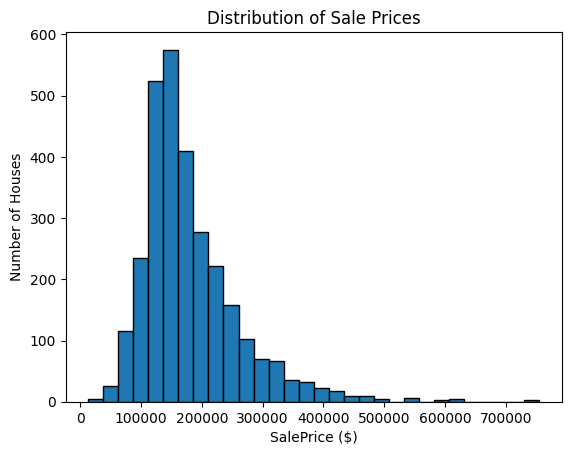

[ 12789.          37529.36666667  62269.73333333  87010.1
 111750.46666667 136490.83333333 161231.2        185971.56666667
 210711.93333333 235452.3        260192.66666667 284933.03333333
 309673.4        334413.76666667 359154.13333333 383894.5
 408634.86666667 433375.23333333 458115.6        482855.96666667
 507596.33333333 532336.7        557077.06666667 581817.43333333
 606557.8        631298.16666667 656038.53333333 680778.9
 705519.26666667 730259.63333333 755000.        ]


In [19]:
counts, classes, patches = plt.hist(data['SalePrice'], bins=30, edgecolor='black')

plt.title("Distribution of Sale Prices")
plt.xlabel("SalePrice ($)")
plt.ylabel("Number of Houses")
plt.show()
print(classes)

In [20]:
# not equally distributed = NE - intervale egale
y_classNE = pd.cut(data['SalePrice'], bins=[0]+classes, labels=False, include_lowest=True)
y_classNE = y_classNE.astype(int)

In [21]:
X_trainNE10, X_testNE10, y_trainNE10, y_testNE10 = train_test_split(
    X_numeric, y_classNE, test_size=0.1, random_state=42
)

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_trainNE10 = le.fit_transform(y_trainNE10)
y_testNE10 = le.transform(y_testNE10)

In [23]:
modelNE10 = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    objective='multi:softmax'
)

modelNE10.fit(X_trainNE10, y_trainNE10)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [24]:
y_predNE10 = modelNE10.predict(X_testNE10)
y_probNE10 = modelNE10.predict_proba(X_testNE10)

print("\n Accuracy:", accuracy_score(y_testNE10, y_predNE10))

print("\n f1 score: ", sklearn.metrics.f1_score(y_testNE10, y_predNE10, average='weighted'))

print("\n Precision:", sklearn.metrics.precision_score(y_testNE10, y_predNE10, average='weighted', zero_division=0))

print("\n Recall", sklearn.metrics.recall_score(y_testNE10, y_predNE10, average='weighted', zero_division=0))

print("\n Predicted class labels:", y_predNE10[:5])
print(" Actual class labels   :", y_testNE10[:5])



 Accuracy: 0.49146757679180886

 f1 score:  0.4825041004144603

 Precision: 0.4811894273463453

 Recall 0.49146757679180886

 Predicted class labels: [4 4 8 4 4]
 Actual class labels   : [5 4 7 4 4]


In [25]:
X_trainNE20, X_testNE20, y_trainNE20, y_testNE20 = train_test_split(
    X_numeric, y_classNE, test_size=0.2, random_state=42
)

In [26]:
le = LabelEncoder()
y_trainNE20 = le.fit_transform(y_trainNE20)
y_testNE20 = le.transform(y_testNE20)

In [27]:
modelNE20 = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    objective='multi:softmax'
)

modelNE20.fit(X_trainNE20, y_trainNE20)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [28]:
y_predNE20 = modelNE20.predict(X_testNE20)
y_probNE20 = modelNE20.predict_proba(X_testNE20)

print("\n Accuracy:", accuracy_score(y_testNE20, y_predNE20))

print("\n f1 score: ", sklearn.metrics.f1_score(y_testNE20, y_predNE20, average='weighted'))

print("\n Precision:", sklearn.metrics.precision_score(y_testNE20, y_predNE20, average='weighted', zero_division=0))

print("\n Recall", sklearn.metrics.recall_score(y_testNE20, y_predNE20, average='weighted', zero_division=0))

print("\n Predicted class labels:", y_predNE20[:5])
print(" Actual class labels   :", y_testNE20[:5])


 Accuracy: 0.47952218430034127

 f1 score:  0.47039518407340236

 Precision: 0.4676280855143609

 Recall 0.47952218430034127

 Predicted class labels: [5 4 7 5 4]
 Actual class labels   : [5 4 7 4 4]


In [29]:
X_trainS10, X_testS10, y_trainS10, y_testS10 = train_test_split(
    X_numeric, y_classNE, test_size=0.1, stratify=y_classNE, random_state=42
)

In [30]:
y_trainS10 = le.fit_transform(y_trainS10)
y_testS10 = le.transform(y_testS10)

In [31]:
modelS10 = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    objective='multi:softmax'
)

modelS10.fit(X_trainS10, y_trainS10)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [32]:
y_predS10 = modelS10.predict(X_testS10)
y_probS10 = modelS10.predict_proba(X_testS10)

print("\n Accuracy:", accuracy_score(y_testS10, y_predS10))

print("\n f1 score: ", sklearn.metrics.f1_score(y_testS10, y_predS10, average='weighted'))

print("\n Precision:", sklearn.metrics.precision_score(y_testS10, y_predS10, average='weighted', zero_division=0))

print("\n Recall", sklearn.metrics.recall_score(y_testS10, y_predS10, average='weighted', zero_division=0))

print("\n Predicted class labels:", y_predS10[:5])
print(" Actual class labels   :", y_testS10[:5])


 Accuracy: 0.4778156996587031

 f1 score:  0.46821266925837557

 Precision: 0.4785192287824504

 Recall 0.4778156996587031

 Predicted class labels: [6 4 5 4 4]
 Actual class labels   : [8 4 6 4 5]


<Figure size 3000x2000 with 0 Axes>

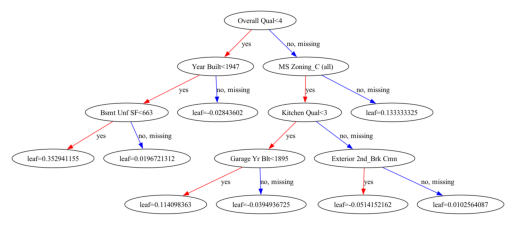

In [35]:
import graphviz
from xgboost import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 20))  
plot_tree(modelNE10, tree_idx=1)
plt.show()

<Figure size 1000x800 with 0 Axes>

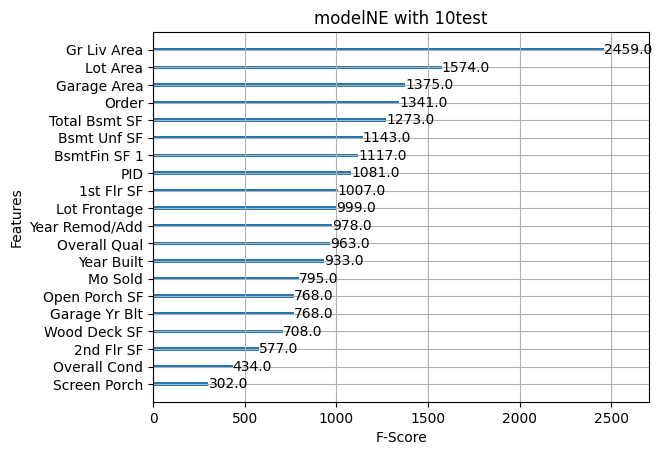

In [36]:
plt.figure(figsize=(10, 8))
plot_importance(
    modelEq20,
    importance_type='weight',
    xlabel='F-Score',
    max_num_features=20 
)
plt.title("modelNE with 10test")
plt.show()

<Figure size 3000x2000 with 0 Axes>

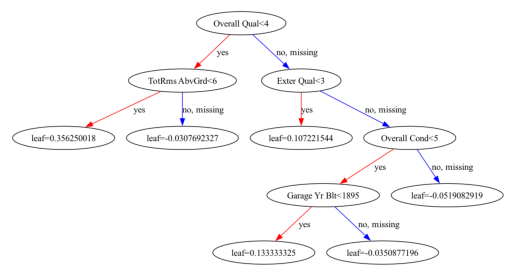

In [38]:
plt.figure(figsize=(30, 20))  
plot_tree(modelS10, tree_idx=1) 
plt.show()

<Figure size 1000x800 with 0 Axes>

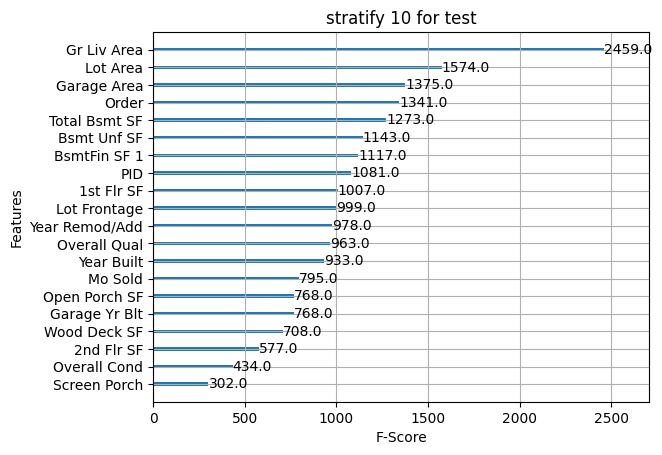

In [39]:
plt.figure(figsize=(10, 8))
plot_importance(
    modelEq20,
    importance_type='weight',
    xlabel='F-Score',
    max_num_features=20 
)
plt.title("stratify 10 for test")
plt.show()

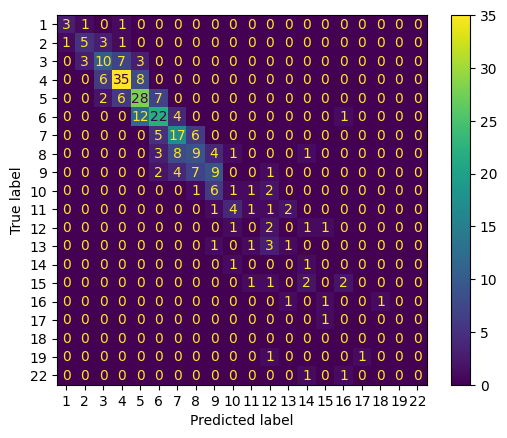

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
   y_testNE10, y_predNE10) #not equelly distributed, equal intervals

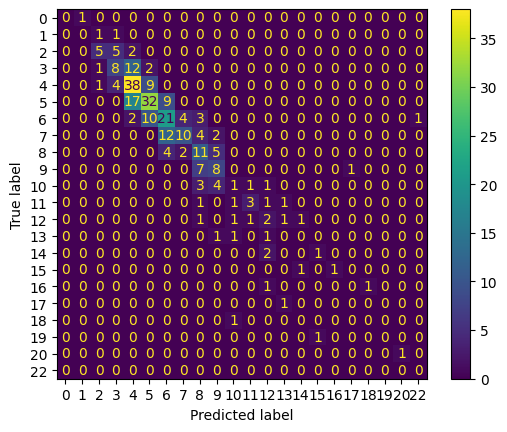

In [ ]:
ConfusionMatrixDisplay.from_predictions(
   y_testS10, y_predS10) #stratify

In [44]:
from sklearn.model_selection import KFold
modelK = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    objective='multi:softmax'
)


In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold5 = KFold(n_splits=5, shuffle=True, random_state=42)
y_encoded = le.fit_transform(y_classNE)
score5 = cross_val_score(modelK, X_numeric, y_encoded, cv=kfold5)
print("5Fold  Accuracy :", score5)
print("Mean:", np.mean(score5))



5Fold  Accuracy : [0.47952218 0.49146758 0.48976109 0.49658703 0.45733788]
Mean: 0.4829351535836177


In [46]:
kfold10 = KFold(n_splits=10, shuffle=True, random_state=42)
score10 = cross_val_score(modelK, X_numeric, y_encoded, cv=kfold10)
print("10Fold  Accuracy :", score10)
print("Mean:", np.mean(score10))

10Fold  Accuracy : [0.49146758 0.47440273 0.47098976 0.48464164 0.48805461 0.5221843
 0.50170648 0.49488055 0.45392491 0.46075085]
Mean: 0.48430034129692834


dureaza destul de mult

In [47]:
y_log = np.log1p(y) 
y_classL, bin_edgesL = pd.qcut(y_log, q=30, labels=False, retbins=True)
print(bin_edgesL)

[ 9.45641889 11.3045581  11.45745812 11.56600065 11.63071739 11.68688718
 11.72804491 11.75979336 11.78296024 11.81303746 11.84223641 11.8706069
 11.89478753 11.91839724 11.9575322  11.98293534 12.02575508 12.06105265
 12.09255071 12.1267913  12.15478461 12.20357453 12.25006241 12.29579126
 12.34583894 12.4049276  12.46844076 12.54697323 12.66149419 12.82782836
 13.53447435]


In [48]:
X_trainL10, X_testL10, y_trainL10, y_testL10 = train_test_split(
    X_numeric, y_classL, test_size=0.1, random_state=42)

In [49]:
modelL10 = XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_classL)),
    learning_rate=0.1,
    max_depth=4,
    n_estimators=100,
    random_state=42
)

modelL10.fit(X_trainL10, y_trainL10)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_class=30, ...)

In [50]:
y_predL10 = modelL10.predict(X_testL10)
y_probL10 = modelL10.predict_proba(X_testL10)

print("\n Accuracy:", accuracy_score(y_testL10, y_predL10))

print("\n f1 score: ", sklearn.metrics.f1_score(y_testL10, y_predL10, average='micro'))

print("\n Precision:", sklearn.metrics.precision_score(y_testL10, y_predL10, average='micro'))

print("\n Recall", sklearn.metrics.recall_score(y_testL10, y_predL10, average='micro'))

print("\n Predicted class labels:", y_predL10[:5])
print(" Actual class labels   :", y_testL10[:5])


 Accuracy: 0.22866894197952217

 f1 score:  0.22866894197952217

 Precision: 0.22866894197952217

 Recall 0.22866894197952217

 Predicted class labels: [13  4 20  1  4]
 Actual class labels   : 1357    15
2367     4
2822    20
2126     5
1544     6
Name: SalePrice, dtype: int64


In [51]:
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb

X_trainL, X_testL, y_trainL, y_testL = train_test_split(
    X_numeric, y_encoded, test_size=0.1, random_state=42)

In [54]:
from lightgbm import LGBMClassifier
modelL = LGBMClassifier(
    objective='multiclass',
    num_class=len(np.unique(y_encoded)),
    learning_rate=0.1,
    n_estimators=200,
    max_depth=6,
    num_leaves=31,
    min_data_in_leaf=20,
    feature_fraction=0.9,
    bagging_fraction=0.8,
    bagging_freq=1,
    random_state=42
)

modelL.fit(X_trainL, y_trainL)

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value

LGBMClassifier(bagging_fraction=0.8, bagging_freq=1, feature_fraction=0.9,
               max_depth=6, min_data_in_leaf=20, n_estimators=200, num_class=24,
               objective='multiclass', random_state=42)

In [55]:
y_predL = modelL.predict(X_testL)
y_probL = modelL.predict_proba(X_testL)

print("\n Accuracy:", accuracy_score(y_testL, y_predL))

print("\n f1 score: ", sklearn.metrics.f1_score(y_testL, y_predL, average='weighted'))

print("\n Precision:", sklearn.metrics.precision_score(y_testL, y_predL, average='weighted', zero_division=0))

print("\n Recall", sklearn.metrics.recall_score(y_testL, y_predL, average='weighted', zero_division=0))

print("\n Predicted class labels:", y_predL[:5])
print(" Actual class labels   :", y_testL[:5])

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20

 Accuracy: 0.14334470989761092

 f1 score:  0.05446604446